# Project 2: Analysis for TMDB Movie 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction

> In this project, i will analysis TMDb movie data which is data set contains information about 10,000 movies collected from The Movie Database (TMDb), based on number of attributes like popularity, budget, revenue, runtime, genres,  vote_average,  release_year, budget_adj, and revenue_adj.
> The analysis aims to answer these questions: 
> <ul>
    <li>Are the number of movies increase each year?</li>
    <li>Which year has the highest / lowest release movies?</li>
    <li>Is the popularity affect over years?</li>
    <li>Does the popularity mean the movie has high votes average?</li>
  </ul>

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

><ul>
    <li>Load dataset and take a quick overview on the attributes.</li>
    <li>See the shape of data set.</li>
    <li>Understand the dataset more by summary statistics.</li>
    <li>Check the data type and any missing data.</li>
    <li>Drop the duplicated row and make sure its deleted by see how many row we have.</li>
    <li>See the disribution of each attribute.</li>
    </ul>

In [47]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [48]:
df.shape

(10866, 21)

In [49]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [51]:
df.duplicated().sum()

1

In [52]:
df.drop_duplicates(inplace=True)
df.duplicated().sum() #check

0

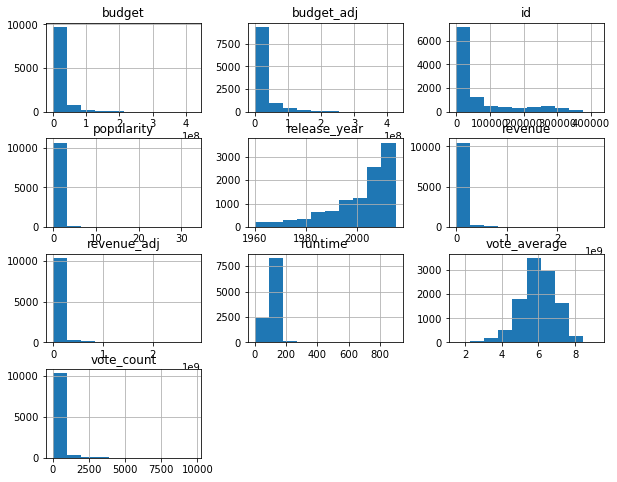

In [53]:
df.hist(figsize=(10,8)); #Histogram for all data

### Data Cleaning 
> <ul>
    <li>Drop some coulmns that is unused, then validate it.</li>
    <li>Droped the nulls in genres.</li>
    <li>Changed release_year data type to datetime.</li>
    </ul>


In [54]:
df.drop(['id','imdb_id','original_title','cast','homepage','director','tagline','keywords','overview','production_companies','vote_count'],
        axis=1, inplace= True) #drop unudes  


In [55]:
df.head() 

,popularity,budget,revenue,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,124,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,120,Action|Adventure|Science Fiction|Thriller,5/13/15,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,119,Adventure|Science Fiction|Thriller,3/18/15,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,137,Action|Crime|Thriller,4/1/15,7.3,2015,1.747999e+08,1.385749e+09


In [56]:
df.dropna(inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    10842 non-null  float64
 1   budget        10842 non-null  int64  
 2   revenue       10842 non-null  int64  
 3   runtime       10842 non-null  int64  
 4   genres        10842 non-null  object 
 5   release_date  10842 non-null  object 
 6   vote_average  10842 non-null  float64
 7   release_year  10842 non-null  int64  
 8   budget_adj    10842 non-null  float64
 9   revenue_adj   10842 non-null  float64
dtypes: float64(4), int64(4), object(2)
memory usage: 931.7+ KB


In [57]:
df['release_date'] = pd.to_datetime(df['release_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   popularity    10842 non-null  float64       
 1   budget        10842 non-null  int64         
 2   revenue       10842 non-null  int64         
 3   runtime       10842 non-null  int64         
 4   genres        10842 non-null  object        
 5   release_date  10842 non-null  datetime64[ns]
 6   vote_average  10842 non-null  float64       
 7   release_year  10842 non-null  int64         
 8   budget_adj    10842 non-null  float64       
 9   revenue_adj   10842 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(4), object(1)
memory usage: 931.7+ KB


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Are the number of movies increase each year?

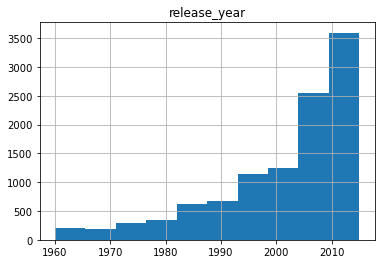

In [58]:
df.hist(column='release_year');

### Research Question 2: Which year has the highest / lowest release movies? 

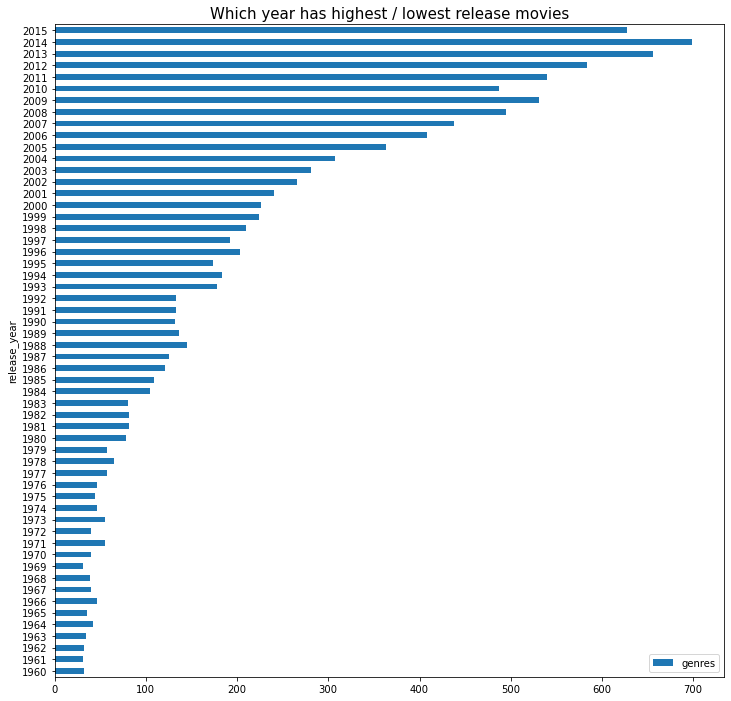

In [59]:
df.groupby(['release_year']).genres.count().plot(kind='barh', figsize=(12,12), fontsize = 10) 
plt.title('Which year has highest / lowest release movies', fontsize = 15)
plt.legend();


As the above charts shows, the highest year whose release is 2014 and the lowest 1961 but in general the total number of released movies increase per years.



### Research Question 3:  Is the popularity affect over years?

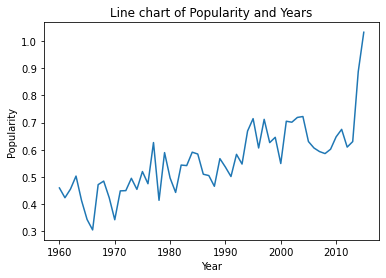

In [60]:
df.groupby('release_year').popularity.mean().plot(kind='line')
plt.title('Line chart of Popularity and Years')
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.show()

We can notice the popularity is vacillating over the years.

### Research Question 4: Does the popularity mean the movie has high votes average?


In [61]:
df['popularity'].mean() 

0.647460591311566

In [62]:
Based on the mean value of popularity, I classifying popularity as low if < 0.647 and high if >= 0.647.

SyntaxError: invalid syntax (<ipython-input-62-173a60b79b65>, line 1)

In [63]:
Low_popularity = df[df['popularity'] < 0.647 ]
High_popularity = df[df['popularity'] >= 0.647 ]

Text(0, 0.5, 'Popularity')

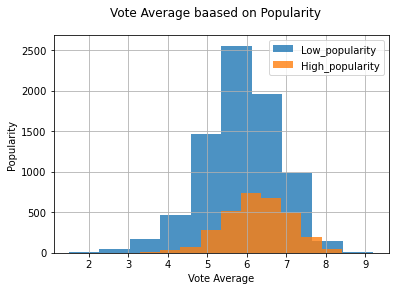

In [64]:
Low_popularity['vote_average'].hist(alpha=0.8, label = 'Low_popularity');
High_popularity['vote_average'].hist(alpha=0.8, label = 'High_popularity');
plt.legend();
plt.suptitle('Vote Average baased on Popularity');
plt.xlabel('Vote Average')
plt.ylabel('Popularity')

From the above visualization, we can clearly see that 'Low_popularity' movies have a vote average between 4.6 to 7.4. On the other hand, we can see 'High_popularity' movies have a vote average between 5.5 to 7.3. 

This indicates that even if the movie is popular, it does not necessarily have a high vote, so the popularity doesn't reflect a movie with high votes.

<a id='conclusions'></a>
## Conclusions

> Finally, after I did the whole process of Data Analysis I got these result:
>    <ul>
        <li> In the Data Wrangling step I take an overview of the data set see the statices numbers, check data types, and if they're missing or duplicate values, look at the distribution for attributes.</li>
        <li> In the Data Cleaning step: dropped unused columns, fixed incorrect data type, and remove nulls and duplicated values to get a more accurate data set.</li>
        <li> Exploratory Data Analysis step: began to ask questions about these data and try to get quick insights by doing the plotting and visualized.</li>
        </ul>

> In general, the industry of movies grows based on revenues per year and I discovered the runtime of the movies doesn't impact the voting average. Also, the average rate of voting is 6 and most movies have this average voting. 

### Limitations:
><ul>   <li> Dropped some unnecessary attributes like id, imdb_id, and etc.</li>
        <li> There are duplicate rows with id 2089 and 2090, I dropped them.</li>
        <li> There are a lot of null values, for example, cast, keyword, director but in the chosen attributes only in genres attribute and I dropped nulls.</li>
        <li> The genres column has many values for one movie which affects the accuracy of the analysis.</li>
        <li> The data type for the release_date attribute was 'object'  and I converted it to 'datetime' to make sense.</li>
        </ul>
